### In This NB we work with different Metrics and Distances. 
##### We will do so by working with Sierpinski triangles
![alt text](image.png)

lets start by creating the triangles


In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import pairwise_distances
from IPython.display import display, clear_output
import seaborn as sns
import pandas as pd
from random import randrange

In [2]:
# Define number of "point generations"
gens = 7

# Define initial triangle vertices (x,y)
a = (0, 0)
b = (1, 0)
c = (0.5, np.sqrt(3)/2)
vertices = (a, b, c)

df = pd.DataFrame(columns=['gen', 'coords'])
for point in vertices:
    df.loc[len(df)] = [0, point]

df

,gen,coords
0,0,"(0, 0)"
1,0,"(1, 0)"
2,0,"(0.5, 0.8660254037844386)"


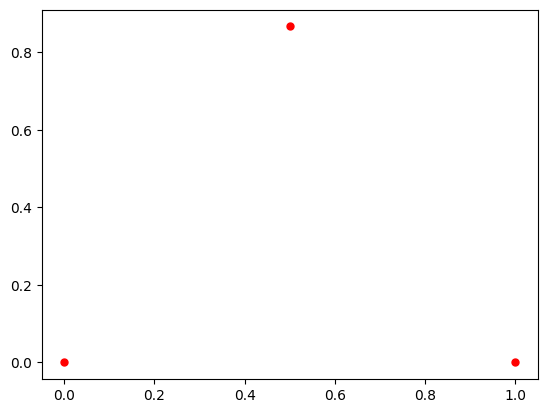

In [3]:
#plot the first triangle
fig, ax = plt.subplots()
ax.plot(*a ,'o', color = 'red', ms= 5)
ax.plot(*b ,'o', color = 'red', ms= 5)
ax.plot(*c ,'o', color = 'red', ms= 5)

In [4]:
# def midpoint function for triangles, init triagles
def midpoint(a, b):
    ''' returns midpoints given 2 points of an equilateral triangle
    
    Parameters:
    a, b: tuple of x, y coordinates

    Returns:
    tuple of x, y coordinates of the midpoint
    '''
    return ((a[0] + b[0])/2, (a[1] + b[1])/2)

mid = ((a[0] + b[0] + c[0]) / 3, (a[1] + b[1] + c[1]) / 3)


triangles = [vertices]


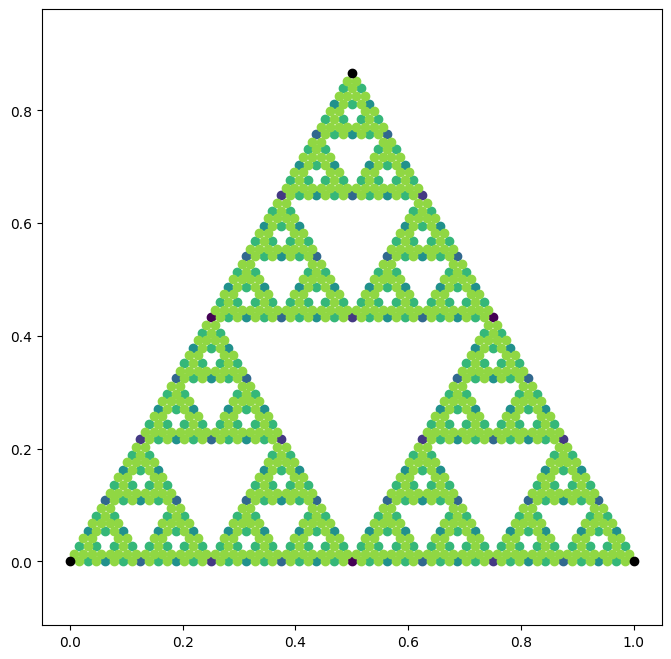

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(gens-1):
    new_triangles = []
    norm_val = i / (gens - 1)
    color = cm.viridis(norm_val)
    
    for triangle in triangles:
        A, B, C = triangle
        
        # Compute midpoints of each side
        AB_mid = midpoint(A, B)
        BC_mid = midpoint(B, C)
        CA_mid = midpoint(C, A)
        
        ax.scatter(*zip(*[AB_mid, BC_mid, CA_mid]), color=color, marker='o')
        
        new_triangles.extend([
            (A, AB_mid, CA_mid),
            (AB_mid, B, BC_mid),
            (CA_mid, BC_mid, C)
        ])

        # Add the points to df for distance calculations
        new_points = pd.DataFrame({'gen': i + 1, 'coords': (AB_mid, BC_mid, CA_mid)})
        df = pd.concat([df, new_points], ignore_index=True)
    
    # Update the list of triangles for the next generation
    triangles = new_triangles

# Optionally, plot the original triangle vertices for reference.
ax.scatter(*zip(*vertices), color='black', marker='o')

plt.axis('equal')
plt.show()


In [6]:
print(df.shape)
df.head()

(1095, 2)


,gen,coords
0,0,"(0, 0)"
1,0,"(1, 0)"
2,0,"(0.5, 0.8660254037844386)"
3,1,"(0.5, 0.0)"
4,1,"(0.75, 0.4330127018922193)"


## Calculation of Distances

In [12]:
# Calculate all pairwise distances between all points
euclid = pairwise_distances(np.array(df['coords'].tolist()).reshape(-1, 2))

minkow = pairwise_distances(np.array(df['coords'].tolist()).reshape(-1, 2), metric='minkowski')

manhatten = pairwise_distances(np.array(df['coords'].tolist()).reshape(-1, 2), metric='manhattan')

generation = pairwise_distances(np.array(df['gen'].tolist()).reshape(-1, 1) )

<bound method NDFrame.head of       gen                           coords
0       0                           (0, 0)
1       0                           (1, 0)
2       0        (0.5, 0.8660254037844386)
3       1                       (0.5, 0.0)
4       1       (0.75, 0.4330127018922193)
...   ...                              ...
1090    6   (0.5234375, 0.825430462982043)
1091    6   (0.5078125, 0.825430462982043)
1092    6        (0.5, 0.8389621099161749)
1093    6  (0.5078125, 0.8524937568503068)
1094    6  (0.4921875, 0.8524937568503068)

[1095 rows x 2 columns]>
[[0. 0. 0. ... 6. 6. 6.]
 [0. 0. 0. ... 6. 6. 6.]
 [0. 0. 0. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 0. 0. 0.]
 [6. 6. 6. ... 0. 0. 0.]
 [6. 6. 6. ... 0. 0. 0.]]


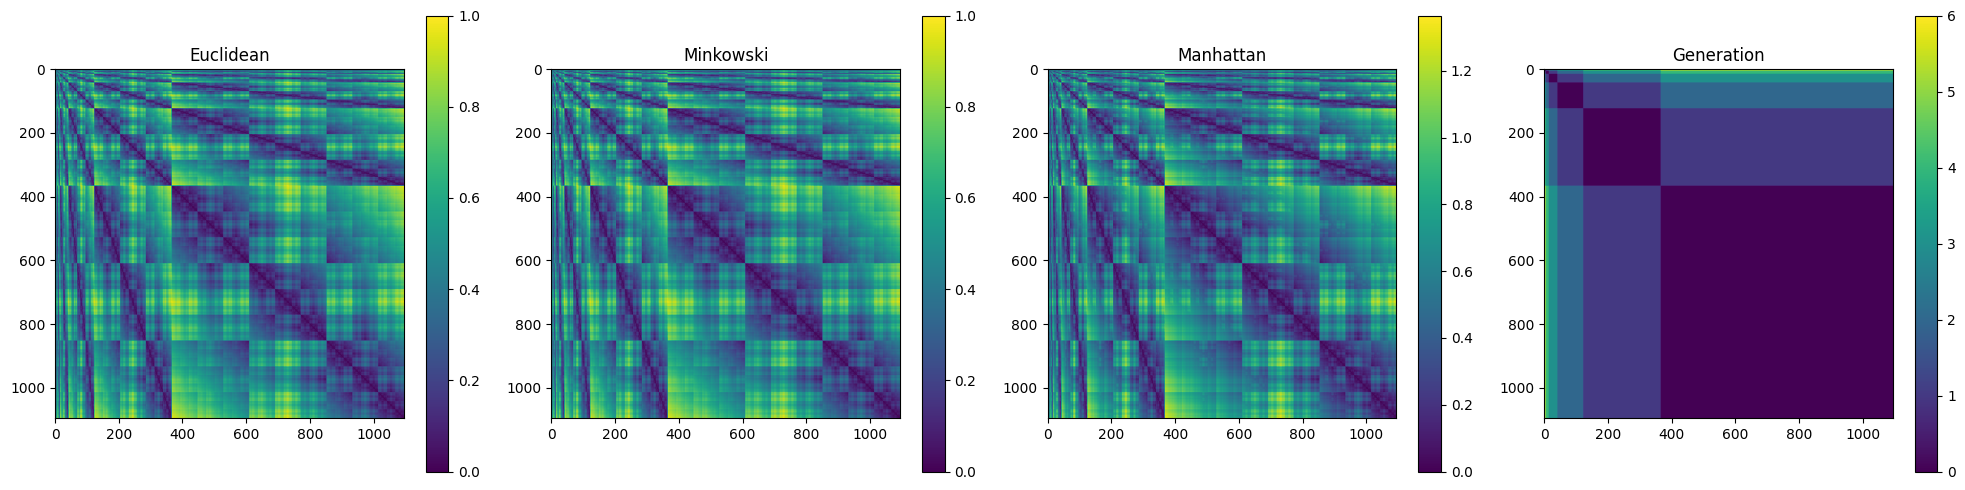

In [15]:
# Create a figure with 1 row and 4 columns of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot Euclidean distances
im0 = axs[0].imshow(euclid, cmap='viridis')
axs[0].set_title("Euclidean")
fig.colorbar(im0, ax=axs[0])

# Plot Minkowski distances
im1 = axs[1].imshow(minkow, cmap='viridis')
axs[1].set_title("Minkowski")
fig.colorbar(im1, ax=axs[1])

# Plot Manhattan distances
im2 = axs[2].imshow(manhatten, cmap='viridis')
axs[2].set_title("Manhattan")
fig.colorbar(im2, ax=axs[2])

# Plot Generation distances
im3 = axs[3].imshow(generation, cmap='viridis')
axs[3].set_title("Generation")
fig.colorbar(im3, ax=axs[3])

plt.tight_layout()
plt.show()


In [16]:
#max of each distance
max_euclid = euclid.max()
max_minkow = minkow.max()
max_manhatten = manhatten.max()
max_generation = generation.max()

print(f"Max Euclidean distance: {max_euclid}")
print(f"Max Minkowski distance: {max_minkow}")
print(f"Max Manhattan distance: {max_manhatten}")
print(f"Max Generation distance: {max_generation}")

Max Euclidean distance: 1.0
Max Minkowski distance: 1.0
Max Manhattan distance: 1.3660254037844386
Max Generation distance: 6.0


## Playground (don't mind this)

In [ ]:
#for each generation....
spielwiese = False

if spielwiese:
    for i in range(gens-1):
        midpoints =[midpoint(p1,p2) for p1,p2 in itertools.combinations(df['coords'], 2)]
        
        # Calculating new midpiints that are not already in the dataframe 
        existing_points = set(df['coords'])
        unique_midpoints = [m for m in midpoints if m not in existing_points]
        unique_midpoints = list({m for m in unique_midpoints})
        new_points = pd.DataFrame({'gen': i + 1, 'coords': unique_midpoints})

        print(new_points)

        #coloring in verdis style
        norm_val = i / (gens - 1)
        color = cm.viridis(norm_val)

        # plotting the new points
        ax.scatter(*zip(*unique_midpoints), color=(color), marker='o')

        #adding them to the df
        df = pd.concat([df, new_points], ignore_index=True)


    display(fig)
    df

       gen                             coords
0        1  (0.66015625, 0.35858864375449406)
1        1  (0.93359375, 0.10148735200598889)
2        1   (0.63671875, 0.5886266416347357)
3        1  (0.61328125, 0.29093040908383483)
4        1     (0.90625, 0.08118988160479113)
...    ...                                ...
12474    1    (0.421875, 0.41948105495808746)
12475    1    (0.3828125, 0.3382911733532963)
12476    1  (0.57421875, 0.11501899894012076)
12477    1   (0.51953125, 0.7104114640419223)
12478    1       (0.375, 0.35182282028742823)

[12479 rows x 2 columns]


KeyboardInterrupt: 